In [18]:
import numpy as np
import matplotlib.pyplot as pyplot
import math

Zadanie 1 Wielomiany interpolujące

Dla funkcji $f(x) = \frac{1}{1+x^2}$ i $n = 5,10,15$ wylicz wielomian interpolacyjny $p_{n}$ z $n+1$ węzłami równoodległymi w przedziale $[-5, 5]$.

 - Narysuj funkcje $f(x)$ oraz $p_{n}(x)$
 - Wylicz i narysuj reszty interpolacji ${\epsilon}(x) = f(x) - p_{n}(x)$ w 30 równoodległych punktach powyższego przedziału.





In [19]:
def f(x):
    return 1 / (1 + x ** 2)


Do interpolacji wykorzystam tablicę Vandermonda.


In [20]:
def interpolacja_z_Vandermondem(n, dokladnosc_rysowania=1000):
    wyniki = []
    x = np.linspace(start=-5, stop=5, num=n + 1, endpoint=True)
    y = list(map(f, x))

    vander_x = np.vander(x=x, N=n + 1, increasing=True)    #macierz 1D, ilosc_kolumn, rosnaco
    wspolczynniki = np.linalg.solve(vander_x, y)

    for x in np.linspace(start=-5, stop=5, num=dokladnosc_rysowania, endpoint=True):
        temp_wynik = 0
        for wykladnik, wspolczynnik in enumerate(wspolczynniki):
            temp_wynik += wspolczynnik * (x ** wykladnik)
        wyniki.append(temp_wynik)

    return wyniki

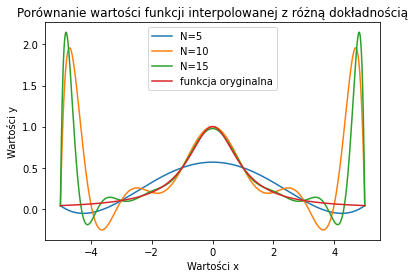

In [21]:
dokladnosc = 1000
x = np.linspace(start=-5, stop=5, num=dokladnosc, endpoint=True)

fig1, ax1 = pyplot.subplots()
ax1.set_title("Porównanie wartości funkcji interpolowanej z różną dokładnością")
ax1.set_xlabel("Wartości x")
ax1.set_ylabel("Wartości y")

pyplot.plot(x, interpolacja_z_Vandermondem(5, dokladnosc), label="N=5")
pyplot.plot(x, interpolacja_z_Vandermondem(10, dokladnosc), label="N=10")
pyplot.plot(x, interpolacja_z_Vandermondem(15, dokladnosc), label="N=15")
pyplot.plot(x, f(x), label="funkcja oryginalna")

ax1.legend()

Jak widać na powyższym wykresie, wraz ze zwiększaniem ilości "punktów precyzji"
(zwiększania stopnia wielomianu przez który przybliżamy funkcję)
wartości przybliżenia zdają się być dokładniejsze w środkowej części wykresu,
lecz na przegach powstają ogromne skoki (efekt Rungego).

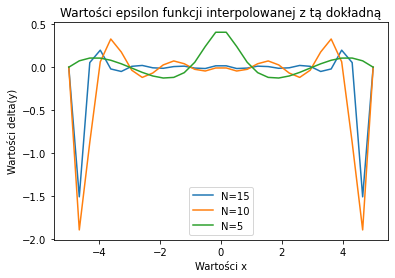

In [30]:
fig1, ax1 = pyplot.subplots()
ax1.set_title("Wartości epsilon funkcji interpolowanej z tą dokładną")
ax1.set_xlabel("Wartości x")
ax1.set_ylabel("Wartości delta(y)")

def roznica_epsilon(n):
    temp_x = np.linspace(start=-5, stop=5, num=30, endpoint=True)
    pyplot.plot(temp_x, f(temp_x) - interpolacja_z_Vandermondem(n, 30), label="N={}".format(n) )

roznica_epsilon(15)
roznica_epsilon(10)
roznica_epsilon(5)

ax1.legend()

Problemy związane z tak dużą deltą na brzegach można rozwiązać
poprzez inne niż liniowe dobieranie punktów pomiarów im gęściej będziemy sprawdzać przy brzegach, tym mniejsze będą tam różnice.

Zadanie 2 Wielomiany interpolujące

Dla danej funkcji i przedziału z poprzedniego zadania oraz $n=15$ 
znajdź wielomian interpolacyjny w węzłach Czebyszewa, danych wzorem 

$x_{k} = \frac{1}{2}(a+b)+\frac{1}{2}(b-a)\cos(\frac{2k-1}{2n}\pi)$

gdzie $k=1,...,n$, a $a,b$ są odpowiednio początkiem i końcem przedziału interpolacji. Narysuj wykres wynikowego wielomianu. 

W jaki sposób zmienił się błąd interpolacji w porównaniu do wyników z poprzedniego zadania? Czemu tak się stało? 
 